In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data.xlsx','age')
df

,Year,Type,Age,Deaths
0,2017,Urban,Below 1,6194
1,2017,Urban,1-4,1853
2,2017,Urban,5-14,2306
3,2017,Urban,15-24,5511
4,2017,Urban,25-34,8142
...,...,...,...,...
115,2022,Rural,35-44,1596
116,2022,Rural,45-54,2101
117,2022,Rural,55-64,2369
118,2022,Rural,65-69,1116


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    120 non-null    int64 
 1   Type    120 non-null    object
 2   Age     120 non-null    object
 3   Deaths  120 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.9+ KB


In [4]:
df.describe()

,Year,Deaths
count,120.000000,120.000000
mean,2019.500000,7172.450000
std,1.714986,9659.935414
min,2017.000000,373.000000
25%,2018.000000,1427.250000
50%,2019.500000,2646.500000
75%,2021.000000,9061.500000
max,2022.000000,50340.000000


In [5]:
urban = df[df['Type'] == 'Urban']
urban

,Year,Type,Age,Deaths
0,2017,Urban,Below 1,6194
1,2017,Urban,1-4,1853
2,2017,Urban,5-14,2306
3,2017,Urban,15-24,5511
4,2017,Urban,25-34,8142
5,2017,Urban,35-44,11324
6,2017,Urban,45-54,16355
7,2017,Urban,55-64,21203
8,2017,Urban,65-69,11471
9,2017,Urban,70 above,33335


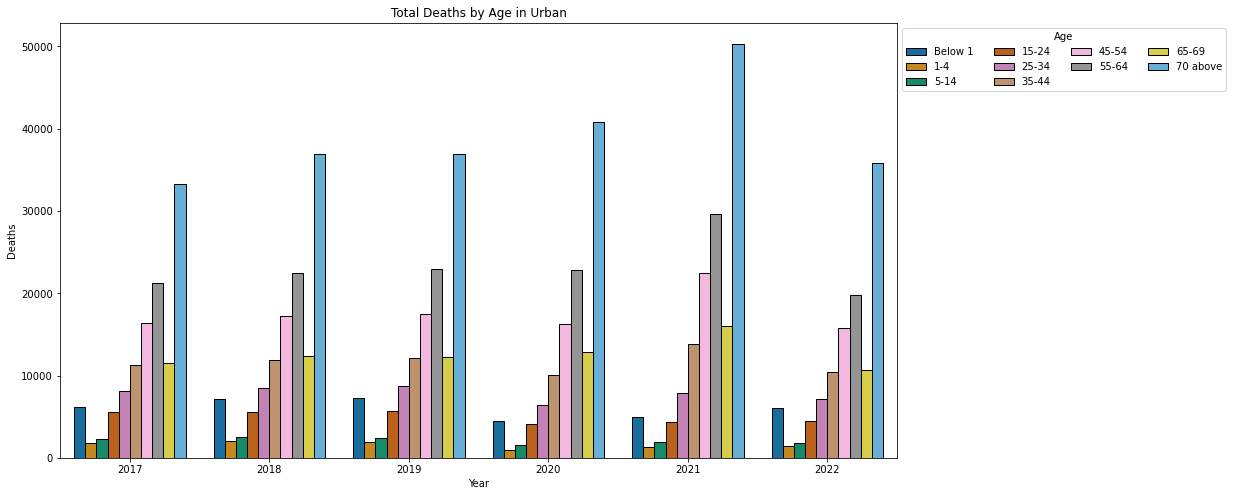

In [6]:
age_order = ['Below 1','1-4','5-14','15-24','25-34','35-44','45-54','55-64','65-69','70 above']


grouped_data = urban.groupby(['Year', 'Age'])['Deaths'].sum().reset_index()
grouped_data['Age'] = pd.Categorical(grouped_data['Age'], categories=age_order, ordered=True)

grouped_data = grouped_data.sort_values(['Year', 'Age'])

plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data, x='Year', y='Deaths', hue='Age', hue_order=age_order, edgecolor='black', linewidth=1,palette = "colorblind")
plt.legend(title='Age', bbox_to_anchor=(1, 1), loc='upper left', ncol=4)
plt.title('Total Deaths by Age in Urban')
plt.show()

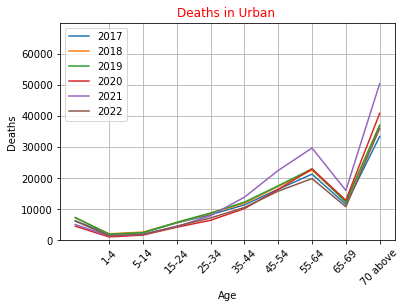

In [7]:
plt.title('Deaths in Urban ',color='r')
plt.xlabel('Age Groups')
plt.xticks(range(1, 11, 1))
plt.ylim(0, 70000)
plt.yticks(np.arange(0, 70000, 10000))
plt.ylabel('Deaths')
urban.set_index('Age', inplace=True)
urban.groupby('Year')['Deaths'].plot(legend=True)
plt.xticks(rotation = 45)
plt.grid()

In [8]:
rural = df[df['Type'] == 'Rural']
rural

,Year,Type,Age,Deaths
10,2017,Rural,Below 1,1451
11,2017,Rural,1-4,522
12,2017,Rural,5-14,568
13,2017,Rural,15-24,1057
14,2017,Rural,25-34,1247
15,2017,Rural,35-44,1684
16,2017,Rural,45-54,2259
17,2017,Rural,55-64,2728
18,2017,Rural,65-69,1351
19,2017,Rural,70 above,2978


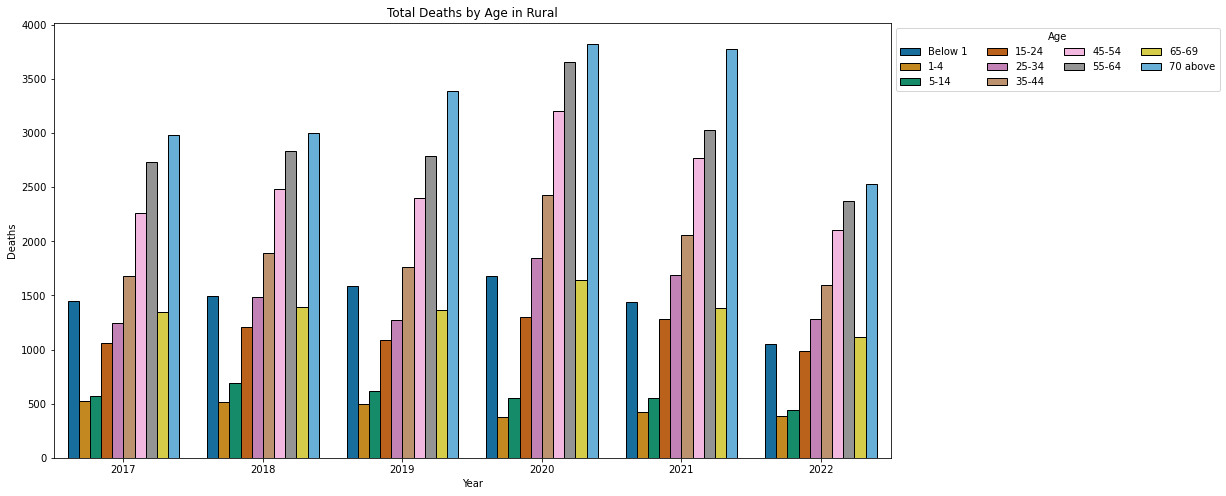

In [9]:
age_order = ['Below 1','1-4','5-14','15-24','25-34','35-44','45-54','55-64','65-69','70 above']


grouped_data = rural.groupby(['Year', 'Age'])['Deaths'].sum().reset_index()
grouped_data['Age'] = pd.Categorical(grouped_data['Age'], categories=age_order, ordered=True)

grouped_data = grouped_data.sort_values(['Year', 'Age'])

plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data, x='Year', y='Deaths', hue='Age', hue_order=age_order, edgecolor='black', linewidth=1,palette = "colorblind")
plt.legend(title='Age', bbox_to_anchor=(1, 1), loc='upper left', ncol=4)
plt.title('Total Deaths by Age in Rural')
plt.show()

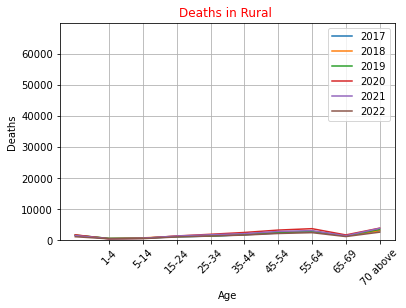

In [10]:
plt.title('Deaths in Rural ',color='r')
plt.xlabel('Age Groups')
plt.xticks(range(1, 11, 1))
plt.ylim(0, 70000)
plt.yticks(np.arange(0, 70000, 10000))
plt.ylabel('Deaths')
rural.set_index('Age', inplace=True)
rural.groupby('Year')['Deaths'].plot(legend=True)
plt.xticks(rotation = 45)
plt.grid()

## Yearwise Deaths 

In [11]:
deaths_2017 = df[df['Year'] == 2017]
print(deaths_2017)

    Year   Type       Age  Deaths
0   2017  Urban   Below 1    6194
1   2017  Urban       1-4    1853
2   2017  Urban      5-14    2306
3   2017  Urban     15-24    5511
4   2017  Urban     25-34    8142
5   2017  Urban     35-44   11324
6   2017  Urban     45-54   16355
7   2017  Urban     55-64   21203
8   2017  Urban     65-69   11471
9   2017  Urban  70 above   33335
10  2017  Rural   Below 1    1451
11  2017  Rural       1-4     522
12  2017  Rural      5-14     568
13  2017  Rural     15-24    1057
14  2017  Rural     25-34    1247
15  2017  Rural     35-44    1684
16  2017  Rural     45-54    2259
17  2017  Rural     55-64    2728
18  2017  Rural     65-69    1351
19  2017  Rural  70 above    2978


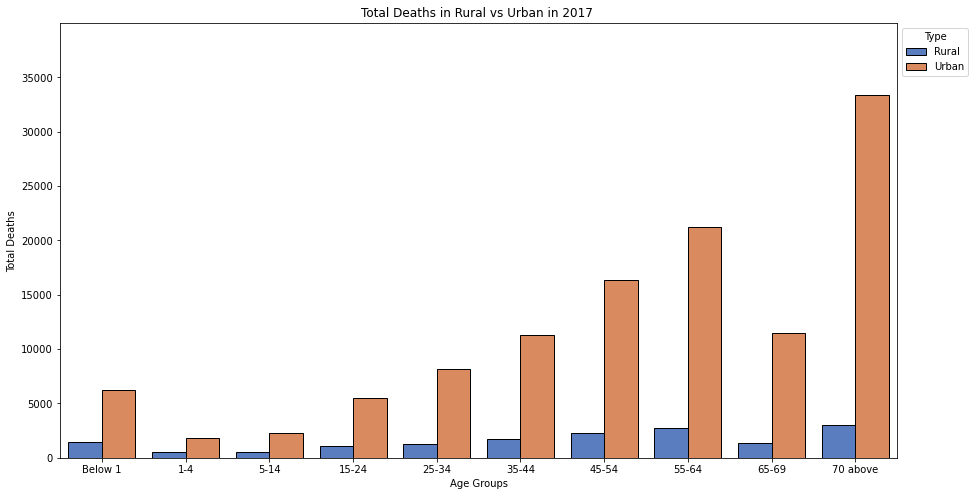

In [12]:
age_order = ['Below 1','1-4','5-14','15-24','25-34','35-44','45-54','55-64','65-69','70 above']

grouped_data = deaths_2017.groupby(['Type', 'Age'])['Deaths'].sum().reset_index()
grouped_data['Age'] = pd.Categorical(grouped_data['Age'], categories=age_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Age'])
plt.figure(figsize=(15, 8))
g = sns.barplot(data=grouped_data, x='Age', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2017 ')
g.set(ylim=(0, 40000))
g.set_yticks(range(0, 40000, 5000))
plt.xlabel('Age Groups')
plt.ylabel('Total Deaths')
plt.show()

In [13]:
deaths_2018 = df[df['Year'] == 2018]
print(deaths_2018)

    Year   Type       Age  Deaths
20  2018  Urban   Below 1    7145
21  2018  Urban       1-4    1996
22  2018  Urban      5-14    2565
23  2018  Urban     15-24    5598
24  2018  Urban     25-34    8537
25  2018  Urban     35-44   11848
26  2018  Urban     45-54   17243
27  2018  Urban     55-64   22519
28  2018  Urban     65-69   12389
29  2018  Urban  70 above   36939
30  2018  Rural   Below 1    1494
31  2018  Rural       1-4     518
32  2018  Rural      5-14     692
33  2018  Rural     15-24    1208
34  2018  Rural     25-34    1485
35  2018  Rural     35-44    1896
36  2018  Rural     45-54    2480
37  2018  Rural     55-64    2832
38  2018  Rural     65-69    1391
39  2018  Rural  70 above    3004


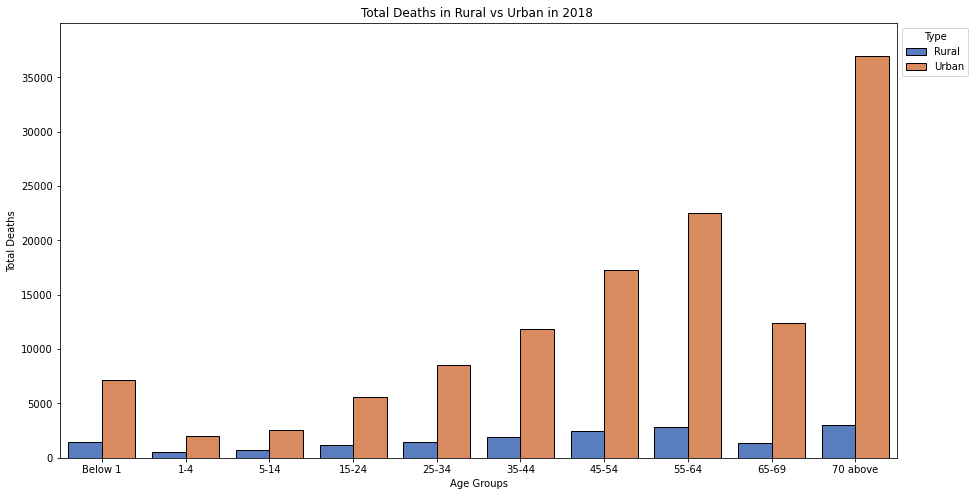

In [14]:
age_order = ['Below 1','1-4','5-14','15-24','25-34','35-44','45-54','55-64','65-69','70 above']

grouped_data = deaths_2018.groupby(['Type', 'Age'])['Deaths'].sum().reset_index()
grouped_data['Age'] = pd.Categorical(grouped_data['Age'], categories=age_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Age'])
plt.figure(figsize=(15, 8))
g = sns.barplot(data=grouped_data, x='Age', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2018 ')
g.set(ylim=(0, 40000))
g.set_yticks(range(0, 40000, 5000))
plt.xlabel('Age Groups')
plt.ylabel('Total Deaths')
plt.show()

In [15]:
deaths_2019 = df[df['Year'] == 2019]
print(deaths_2019)

    Year   Type       Age  Deaths
40  2019  Urban   Below 1    7239
41  2019  Urban       1-4    1901
42  2019  Urban      5-14    2370
43  2019  Urban     15-24    5699
44  2019  Urban     25-34    8710
45  2019  Urban     35-44   12190
46  2019  Urban     45-54   17463
47  2019  Urban     55-64   22924
48  2019  Urban     65-69   12191
49  2019  Urban  70 above   36929
50  2019  Rural   Below 1    1584
51  2019  Rural       1-4     499
52  2019  Rural      5-14     616
53  2019  Rural     15-24    1085
54  2019  Rural     25-34    1277
55  2019  Rural     35-44    1761
56  2019  Rural     45-54    2398
57  2019  Rural     55-64    2785
58  2019  Rural     65-69    1366
59  2019  Rural  70 above    3388


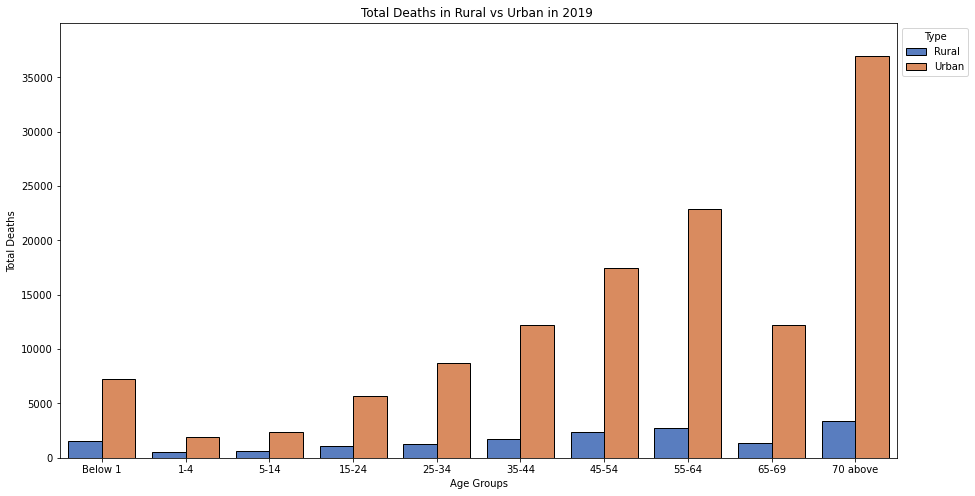

In [16]:
age_order = ['Below 1','1-4','5-14','15-24','25-34','35-44','45-54','55-64','65-69','70 above']

grouped_data = deaths_2019.groupby(['Type', 'Age'])['Deaths'].sum().reset_index()
grouped_data['Age'] = pd.Categorical(grouped_data['Age'], categories=age_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Age'])
plt.figure(figsize=(15, 8))
g = sns.barplot(data=grouped_data, x='Age', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2019 ')
g.set(ylim=(0, 40000))
g.set_yticks(range(0, 40000, 5000))
plt.xlabel('Age Groups')
plt.ylabel('Total Deaths')
plt.show()

In [17]:
deaths_2020 = df[df['Year'] == 2020]
print(deaths_2020)

    Year   Type       Age  Deaths
60  2020  Urban   Below 1    4467
61  2020  Urban       1-4     981
62  2020  Urban      5-14    1597
63  2020  Urban     15-24    4118
64  2020  Urban     25-34    6361
65  2020  Urban     35-44   10116
66  2020  Urban     45-54   16310
67  2020  Urban     55-64   22871
68  2020  Urban     65-69   12815
69  2020  Urban  70 above   40767
70  2020  Rural   Below 1    1678
71  2020  Rural       1-4     373
72  2020  Rural      5-14     556
73  2020  Rural     15-24    1303
74  2020  Rural     25-34    1849
75  2020  Rural     35-44    2429
76  2020  Rural     45-54    3201
77  2020  Rural     55-64    3655
78  2020  Rural     65-69    1638
79  2020  Rural  70 above    3826


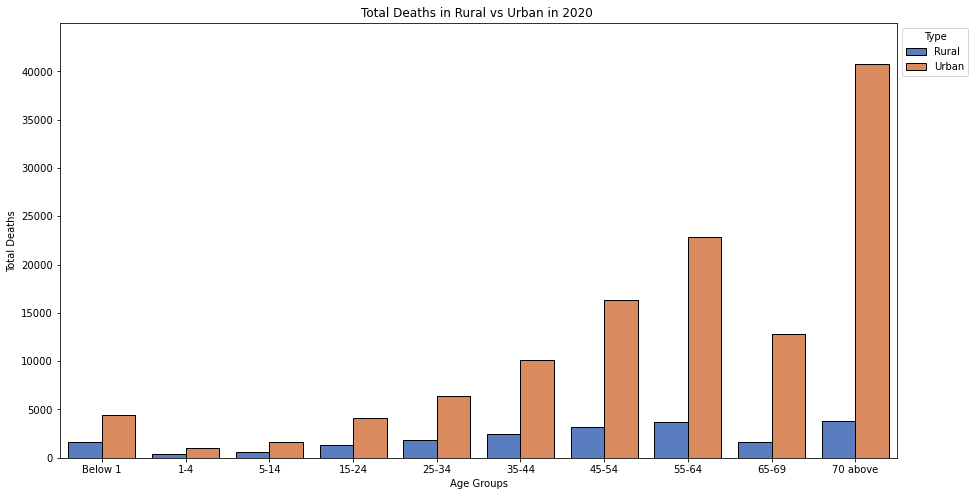

In [18]:
age_order = ['Below 1','1-4','5-14','15-24','25-34','35-44','45-54','55-64','65-69','70 above']

grouped_data = deaths_2020.groupby(['Type', 'Age'])['Deaths'].sum().reset_index()
grouped_data['Age'] = pd.Categorical(grouped_data['Age'], categories=age_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Age'])
plt.figure(figsize=(15, 8))
g = sns.barplot(data=grouped_data, x='Age', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2020 ')
g.set(ylim=(0, 45000))
g.set_yticks(range(0, 45000, 5000))
plt.xlabel('Age Groups')
plt.ylabel('Total Deaths')
plt.show()

In [19]:
deaths_2021 = df[df['Year'] == 2021]
print(deaths_2021)

    Year   Type       Age  Deaths
80  2021  Urban   Below 1    4978
81  2021  Urban       1-4    1320
82  2021  Urban      5-14    1860
83  2021  Urban     15-24    4317
84  2021  Urban     25-34    7843
85  2021  Urban     35-44   13783
86  2021  Urban     45-54   22404
87  2021  Urban     55-64   29626
88  2021  Urban     65-69   15969
89  2021  Urban  70 above   50340
90  2021  Rural   Below 1    1435
91  2021  Rural       1-4     420
92  2021  Rural      5-14     557
93  2021  Rural     15-24    1283
94  2021  Rural     25-34    1686
95  2021  Rural     35-44    2061
96  2021  Rural     45-54    2768
97  2021  Rural     55-64    3027
98  2021  Rural     65-69    1388
99  2021  Rural  70 above    3778


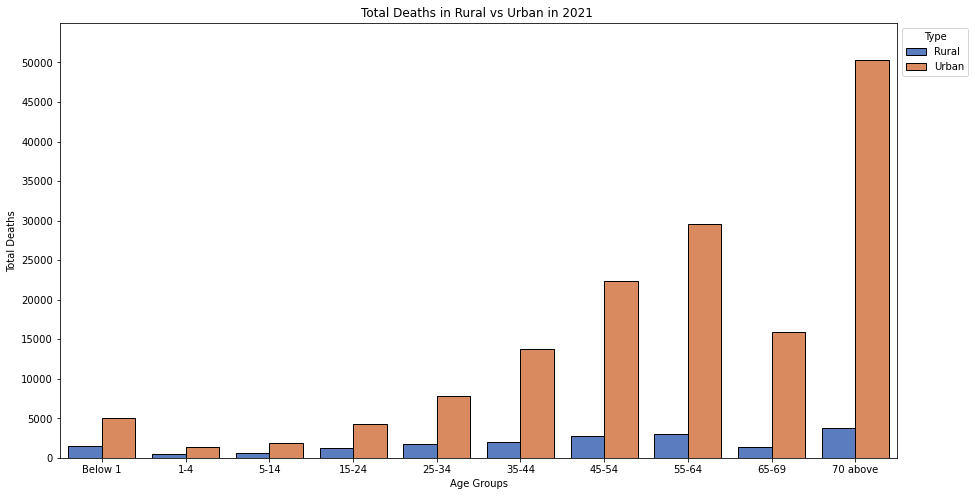

In [20]:
age_order = ['Below 1','1-4','5-14','15-24','25-34','35-44','45-54','55-64','65-69','70 above']

grouped_data = deaths_2021.groupby(['Type', 'Age'])['Deaths'].sum().reset_index()
grouped_data['Age'] = pd.Categorical(grouped_data['Age'], categories=age_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Age'])
plt.figure(figsize=(15, 8))
g = sns.barplot(data=grouped_data, x='Age', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2021 ')
g.set(ylim=(0, 55000))
g.set_yticks(range(0, 55000, 5000))
plt.xlabel('Age Groups')
plt.ylabel('Total Deaths')
plt.show()

In [21]:
deaths_2022 = df[df['Year'] == 2022]
print(deaths_2022)

     Year   Type       Age  Deaths
100  2022  Urban   Below 1    6101
101  2022  Urban       1-4    1404
102  2022  Urban      5-14    1771
103  2022  Urban     15-24    4446
104  2022  Urban     25-34    7105
105  2022  Urban     35-44   10468
106  2022  Urban     45-54   15739
107  2022  Urban     55-64   19775
108  2022  Urban     65-69   10710
109  2022  Urban  70 above   35865
110  2022  Rural   Below 1    1054
111  2022  Rural       1-4     384
112  2022  Rural      5-14     442
113  2022  Rural     15-24     989
114  2022  Rural     25-34    1285
115  2022  Rural     35-44    1596
116  2022  Rural     45-54    2101
117  2022  Rural     55-64    2369
118  2022  Rural     65-69    1116
119  2022  Rural  70 above    2527


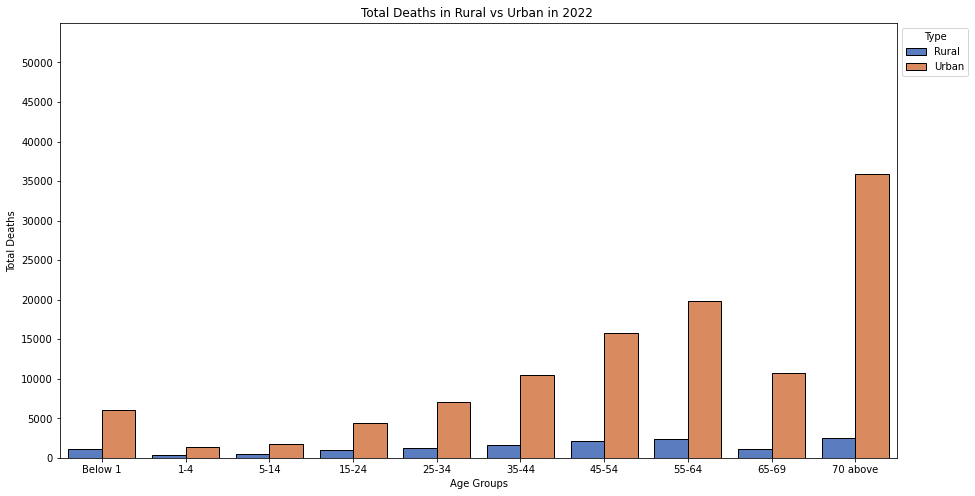

In [22]:
age_order = ['Below 1','1-4','5-14','15-24','25-34','35-44','45-54','55-64','65-69','70 above']

grouped_data = deaths_2022.groupby(['Type', 'Age'])['Deaths'].sum().reset_index()
grouped_data['Age'] = pd.Categorical(grouped_data['Age'], categories=age_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Age'])
plt.figure(figsize=(15, 8))
g = sns.barplot(data=grouped_data, x='Age', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2022 ')
g.set(ylim=(0, 55000))
g.set_yticks(range(0, 55000, 5000))
plt.xlabel('Age Groups')
plt.ylabel('Total Deaths')
plt.show()